# HR Dataset Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ds = pd.read_csv("IBM_Dataset1.csv")

* Stored the dataset in a dataframe

In [3]:
ds.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


* Displayed first 5 rows from the dataframe

In [4]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1058 entries, 0 to 1057
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1058 non-null   int64 
 1   Attrition                 1058 non-null   int64 
 2   BusinessTravel            1058 non-null   object
 3   DailyRate                 1058 non-null   int64 
 4   Department                1058 non-null   object
 5   DistanceFromHome          1058 non-null   int64 
 6   Education                 1058 non-null   int64 
 7   EducationField            1058 non-null   object
 8   EmployeeCount             1058 non-null   int64 
 9   EmployeeNumber            1058 non-null   int64 
 10  EnvironmentSatisfaction   1058 non-null   int64 
 11  Gender                    1058 non-null   object
 12  HourlyRate                1058 non-null   int64 
 13  JobInvolvement            1058 non-null   int64 
 14  JobLevel                

* Displaying information about the data stored inside the dataframe.

In [5]:
ds["EmployeeCount"].value_counts()

EmployeeCount
1    1058
Name: count, dtype: int64

In [6]:
ds.drop("EmployeeCount", axis=1, inplace=True)

* After observing there is only single value inside the EmployeeCount column, it is dropped from the dataframe.

In [7]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1058 entries, 0 to 1057
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1058 non-null   int64 
 1   Attrition                 1058 non-null   int64 
 2   BusinessTravel            1058 non-null   object
 3   DailyRate                 1058 non-null   int64 
 4   Department                1058 non-null   object
 5   DistanceFromHome          1058 non-null   int64 
 6   Education                 1058 non-null   int64 
 7   EducationField            1058 non-null   object
 8   EmployeeNumber            1058 non-null   int64 
 9   EnvironmentSatisfaction   1058 non-null   int64 
 10  Gender                    1058 non-null   object
 11  HourlyRate                1058 non-null   int64 
 12  JobInvolvement            1058 non-null   int64 
 13  JobLevel                  1058 non-null   int64 
 14  JobRole                 

In [8]:
ds["StandardHours"].value_counts()

StandardHours
80    1058
Name: count, dtype: int64

In [9]:
ds.drop("StandardHours", axis=1, inplace=True)

* After observing that a single value is inside the StandardHours column, hence decided to drop it from the dataframe.

In [10]:
ds.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int

* Ensuring if there is any null value present inside the data.

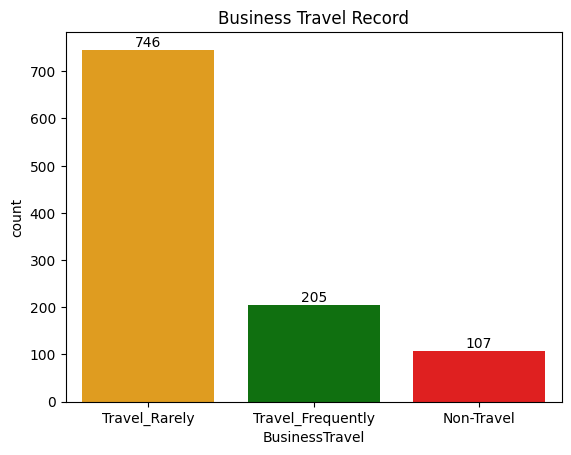

In [11]:
ax=sns.countplot(ds, x="BusinessTravel",hue="BusinessTravel", 
              palette={"Travel_Rarely":"Orange", "Travel_Frequently":"Green", 
                      "Non-Travel":"Red"})
plt.title("Business Travel Record")
for i in range(0,3):
    ax.bar_label(ax.containers[i])
#ax.bar_label(ax.containers[0])
#ax.bar_label(ax.containers[1])
#ax.bar_label(ax.containers[2])
plt.show()

* From above we can clearly see that the number of those who travel rarely is higher than the number of frequent travelers.

In [12]:
means = ds.groupby("Department")["MonthlyIncome"].mean()
means

Department
Human Resources           7380.078947
Research & Development    6402.308131
Sales                     7027.551724
Name: MonthlyIncome, dtype: float64

* Finding the mean of salaries based on each department.

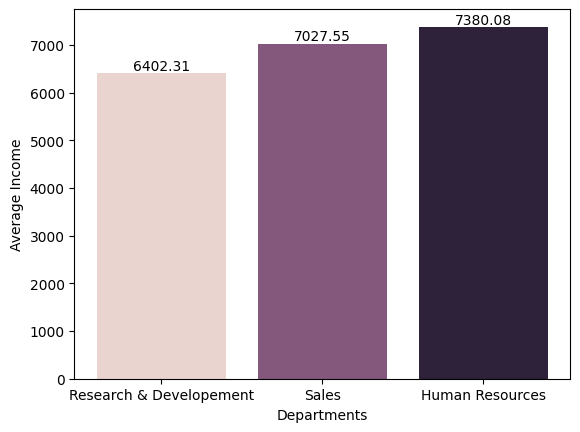

In [13]:
labels=["Research & Developement","Sales","Human Resources"]
ax=sns.barplot(ds,x=means,y=means, hue=means, legend=False)
for i in range(0,3):
    ax.bar_label(ax.containers[i])
plt.xlabel("Departments")
plt.ylabel("Average Income")
plt.xticks(ticks=range(len(labels)), labels=labels)
plt.plot()
plt.show()

* We can see that the Human Resources department has higher average salary compared to other departments.

In [14]:
ds["Department"].value_counts()

Department
Research & Development    701
Sales                     319
Human Resources            38
Name: count, dtype: int64

* Counting the number of employees in each department.

In [15]:
ds["Age"].value_counts()

Age
34    54
35    52
31    49
30    48
36    47
29    44
33    42
32    42
37    41
40    38
38    37
27    36
42    34
28    34
26    30
41    30
45    29
39    25
50    24
44    24
43    23
46    23
25    22
51    18
24    17
52    17
55    16
49    15
53    15
47    14
48    13
54    13
22    12
58    11
59    10
21    10
56    10
20     9
19     9
23     7
18     6
57     4
60     4
Name: count, dtype: int64

* Counting the different age values of employees.

In [16]:
ds["Age"].min()

18

In [17]:
ds["Age"].max()

60

* Finding Min and Max Values of employees Age.

In [18]:
ds["Age_Group"] = pd.cut(ds["Age"], bins=5,labels=["15-24","25-34","35-44","45-54","55-more"])

* Creating the age group column for further analysis.

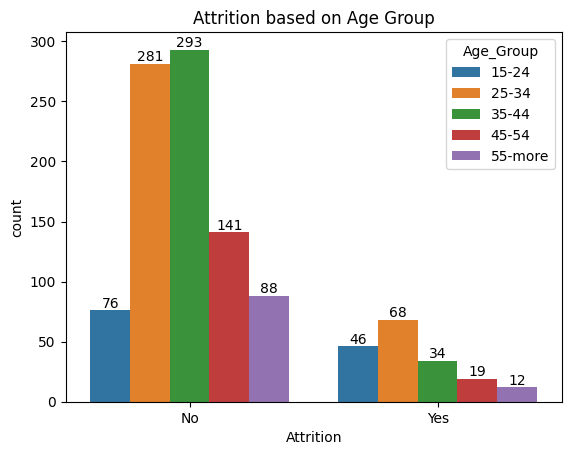

In [19]:
labels=["No","Yes"]
ax=sns.countplot(ds,x="Attrition", hue="Age_Group")
plt.title("Attrition based on Age Group")
for i in range(0,5):
    ax.bar_label(ax.containers[i])
plt.xticks(ticks=range(len(labels)), labels=labels)
plt.show()

* From above we can see that the attrition count of employees is high in the age group of 25 to 34 followed by age group of 15 to 24.

In [20]:
Gender=ds["Gender"].value_counts()

In [21]:
labels=["Male","Female"]

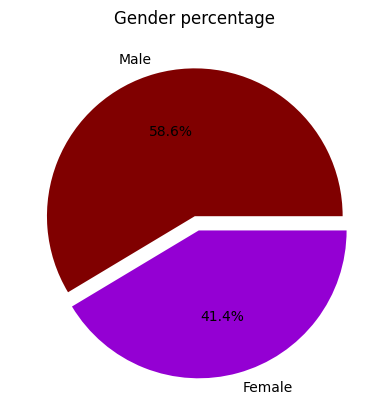

In [22]:
plt.pie(Gender, labels=labels, explode=[0.0,0.1],autopct="%1.1f%%",
    colors=["maroon","darkviolet"])
plt.title("Gender percentage")
plt.show()

* By observing the data based on gender, the number of male employees is more compared to female employees.

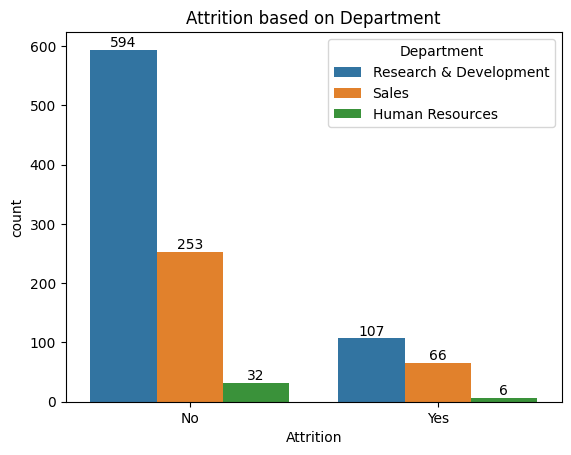

In [23]:
labels=["No","Yes"]
ax=sns.countplot(ds,x="Attrition", hue="Department")
plt.title("Attrition based on Department")
for i in range(0,3):
    ax.bar_label(ax.containers[i])
plt.xticks(ticks=range(len(labels)), labels=labels)
plt.show()

* We can clearly see that the attrition count of the Human Resources is the least.

In [24]:
ds["PercentSalaryHike"].value_counts().sort_values(ascending=False)

PercentSalaryHike
11    158
13    148
12    145
14    141
15     73
18     70
17     58
16     55
19     51
22     44
20     40
21     29
23     21
24     16
25      9
Name: count, dtype: int64

In [25]:
hue_colors = {0:"green", 1:"red"}

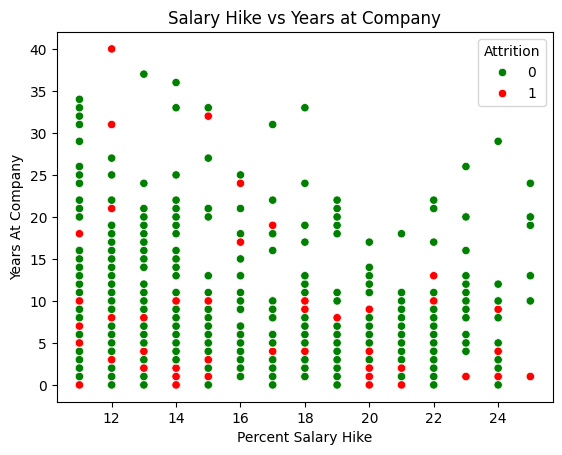

In [26]:
sns.scatterplot(ds,x="PercentSalaryHike", y="YearsAtCompany",hue="Attrition",palette=hue_colors)
plt.title("Salary Hike vs Years at Company")
plt.xlabel("Percent Salary Hike")
plt.ylabel("Years At Company")
plt.show()

* From above it is seen that the percent salary hike for employees with experience between 0 to 10 years at company is the highest.
* We can observe that the employees who have worked in between 0 to 10 years at the company have the highest attrtion rate.

In [27]:
ds["Salary_Group"]=pd.cut(ds["MonthlyIncome"], bins=5, labels=["1000-4000","4001-8000","8001-12000","12001-16000",
                                          "16001-20000"])

* Created a column for salary group.

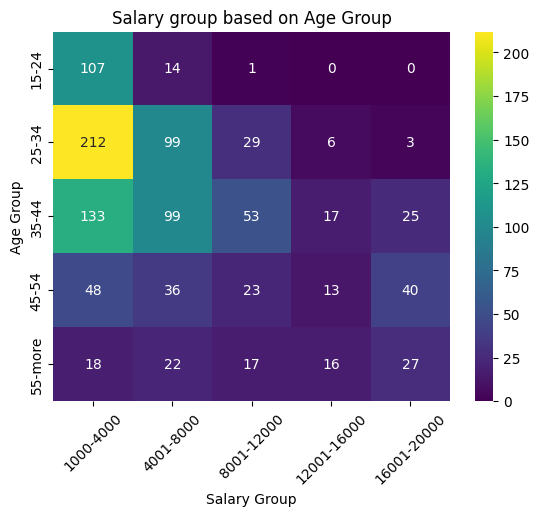

In [28]:
sns.heatmap(pd.crosstab(columns=ds["Salary_Group"], index=ds["Age_Group"]),annot=True,
            fmt="d",cmap="viridis")
plt.title("Salary group based on Age Group")
plt.xlabel("Salary Group")
plt.ylabel("Age Group")
plt.xticks(rotation=45)
plt.show()

* From above we can discover that most of the employees lie between the age group of 25 to 34 and most of them are receiving monthly salaries in the range of 1000 to 4000.
*  In general too, most of the employees from different age groups are receiving monthly salaries in the range of 1000 to 4000.
* There are few employees who have monthly salary of 16000 or more.

In [29]:
ds["YearsSinceLastPromotion"].value_counts()

YearsSinceLastPromotion
0     427
1     248
2     110
7      53
4      49
3      38
5      31
6      22
11     21
9      14
15     13
8      11
13      7
12      6
10      5
14      3
Name: count, dtype: int64

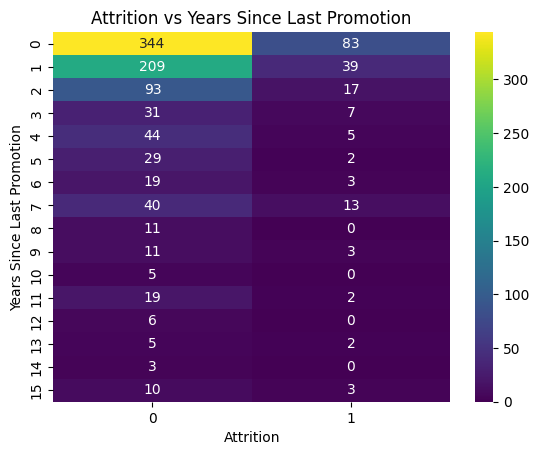

In [30]:
sns.heatmap(pd.crosstab(index=ds["YearsSinceLastPromotion"], columns=ds["Attrition"])
            ,annot=True, fmt="d", cmap="viridis")
plt.title("Attrition vs Years Since Last Promotion")
plt.ylabel("Years Since Last Promotion")
plt.show()

* It is observed that most of the employees are leaving the organization right after the promotion or after completing a year.

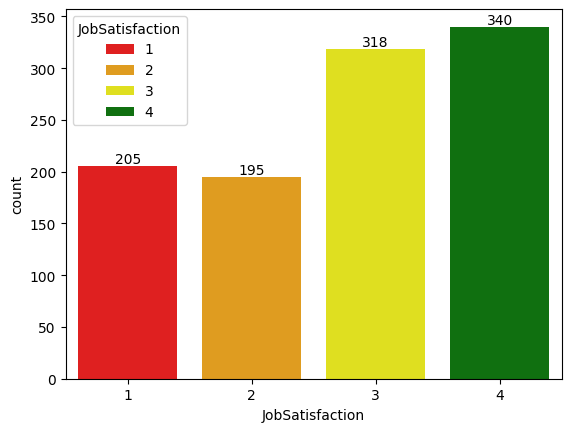

In [31]:
ax=sns.countplot(ds,x="JobSatisfaction", hue="JobSatisfaction", 
                 palette={1:"Red", 2:"Orange", 3:"Yellow", 4:"Green"})
for i in range(0,4):
    ax.bar_label(ax.containers[i])
plt.show()

* Thus, it has shown us that most of the employees are satisfied with their jobs.